# Do patients with diabetes have higher glucose levels than patients without diabetes?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [8]:
path = '~/Scripts/DS/Statistics/data/pima.csv'

In [9]:
df = pd.read_csv(path)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df_i = df[df['outcome'] == 1]
df_o = df[df['outcome'] == 0]

In [42]:
# Balancing the samples.
df_o_sample = df_o.sample(frac=0.536, random_state=42)

In [84]:
#@title Functions
import matplotlib.pyplot as plt
import math

def histogramas(df, features):
    """
    Show histograma.
    Take a pandas dataframe and a list
    of columns

    Args:
        df: a pdDataFrame.
        features: pd.Series or list of Series with
        desire values. 
    """
    plt.figure(figsize = (10, 35))
    for i, feature in enumerate(features):
        ax = plt.subplot(10, 3, i + 1)
        ax.hist(df[feature], bins=50, color='Blue', edgecolor='black',\
               label=feature, alpha=0.2)
        ax.set_title(str.capitalize(feature) + ' Histogram')
        plt.xticks(rotation=45)
        plt.tight_layout(pad=5.0)

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


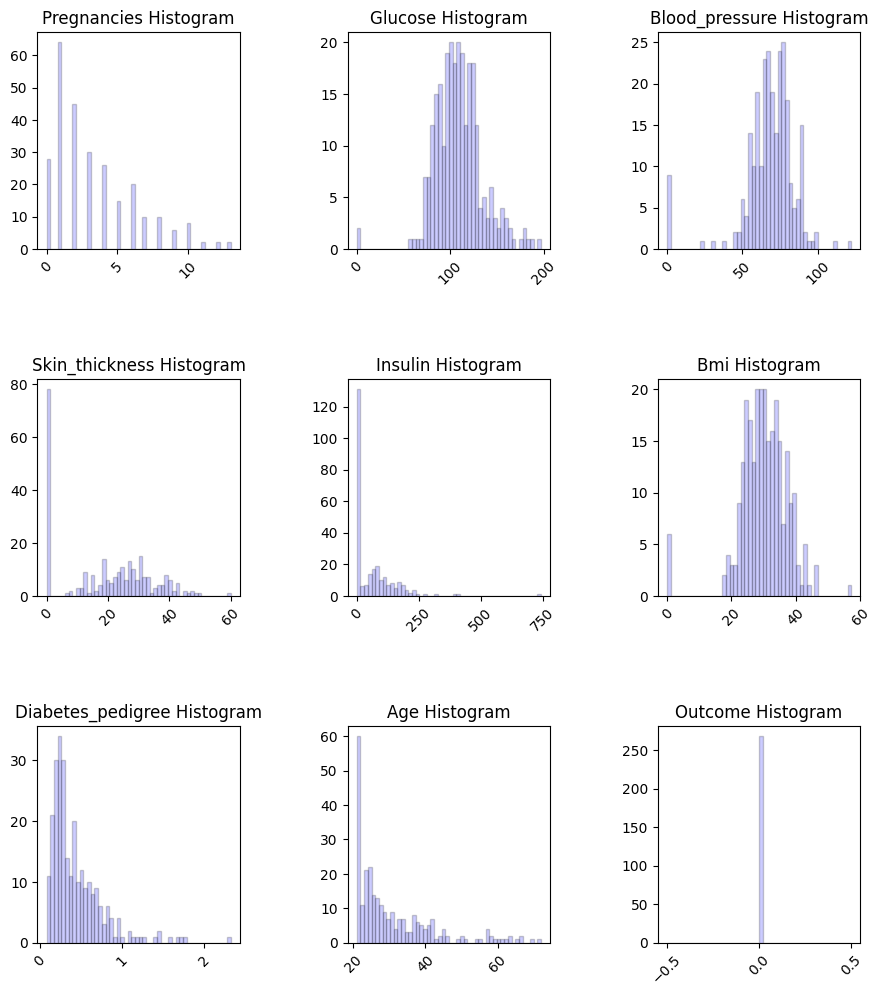

In [52]:
histogramas(df_o_sample, df_o_sample.columns)

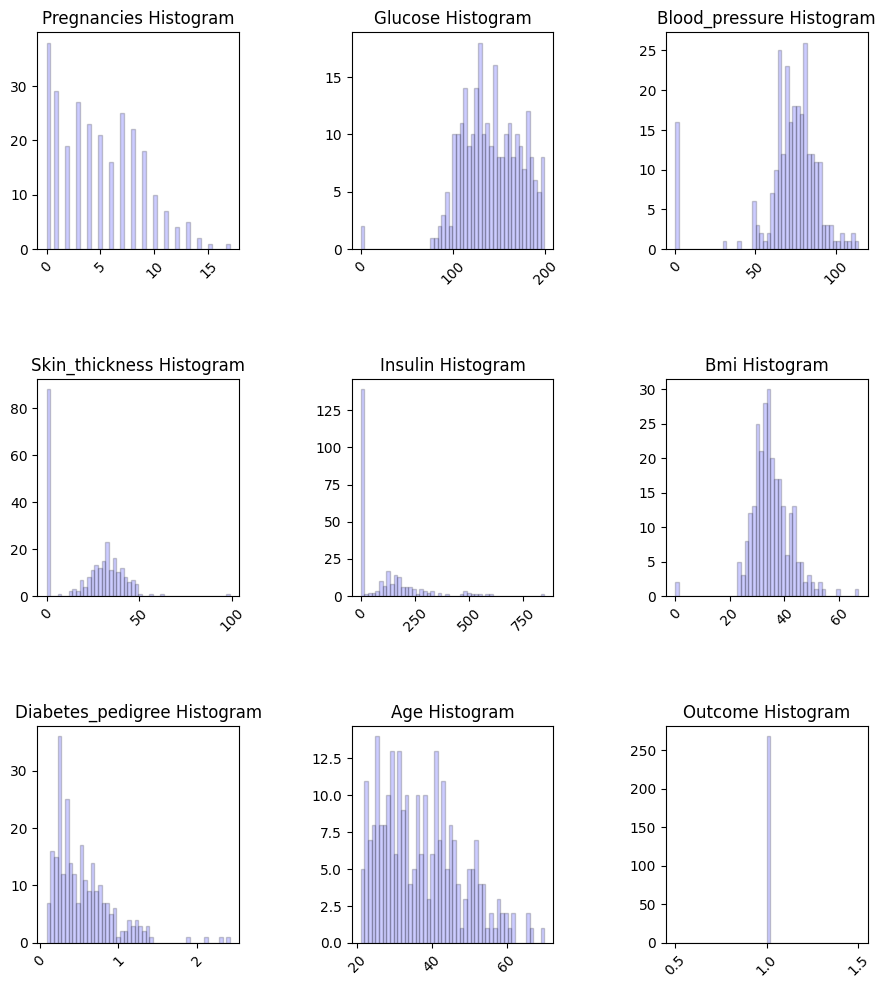

In [53]:
histogramas(df_i, df_i.columns)

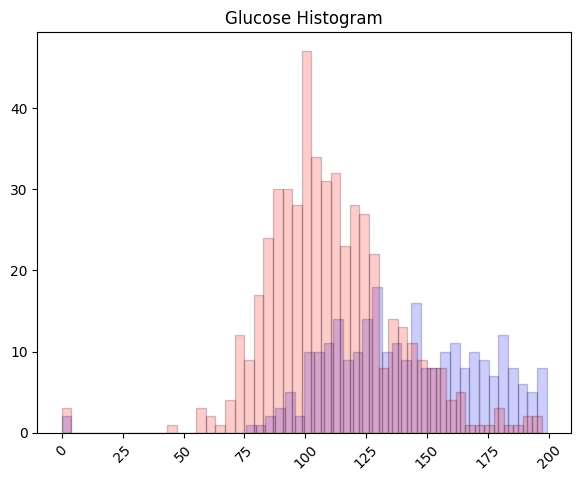

In [50]:
feature = 'glucose'
plt.figure(figsize = (7, 6))
ax = plt.subplot()
ax.hist(df_i[feature], bins=50, color='Blue', edgecolor='black',\
        label=feature, alpha=0.2)
ax.hist(df_o[feature], bins=50, color='Red', edgecolor='black',\
        label=feature, alpha=0.2)
ax.set_title(str.capitalize(feature) + ' Histogram')
plt.xticks(rotation=45)
plt.tight_layout(pad=5.0)

# Note
note the values `glucose` = 0. that does not happens so drop those examples is a good idea

In [68]:
# dropping 
i = df_i[df_i['glucose'] != 0 ]
o = df_o[df_o['glucose'] != 0 ]
## stats
print(stats.describe(i['glucose']))
print(stats.describe(o['glucose']))

DescribeResult(nobs=266, minmax=(78, 199), mean=142.31954887218046, variance=876.1125975315648, skewness=0.09012092392161705, kurtosis=-0.9626447554252175)
DescribeResult(nobs=497, minmax=(44, 197), mean=110.64386317907444, variance=613.8950882715648, skewness=0.6529596223112593, kurtosis=0.6434398312102663)


# These results are workable

The truth is that there's no definitive answer, but a good rule of thumb is that anything with kurtosis from -3 to 3 and skewness from -3 to 3 is close enough for a t-test to work well.

In [79]:
results_t_test = stats.ttest_ind(i['glucose'], o['glucose'])
resultados = pd.DataFrame(results_t_test, index=['T-test', 'p-value'])

In [80]:
resultados

,0
T-test,1.570091e+01
p-value,2.478289e-48


You know that you can reject the null from either of these results:

1. The test statistic is greater than `1.96`.
2. The p-value is less than `0.05`. 

In fact, the p-value is *way* less than `0.05`. But rather than reporting the actual p-value, which is a tiny-yet-clunky number, it's common to round up the reports to a more readable `p < 0.01` or even `p < 0.001`.

The way to interpret this p-value is like this:

"There is a 0.1% chance of observing a difference as large as what is observed, even if the two population means are identical (the null hypothesis is true)."

By contrast, this interpretation is *wrong*:

"There is a 99.9% chance that the difference observed reflects a real difference between populations, and a 0.1% chance that the difference is due to chance."



$$(\overline{X}_{1}-\overline{X}_{2}) \pm 1.96 * {\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}$$



Unfortunately, scipy.stats doesn't include the confidence interval

In [85]:
get_95_ci(i['glucose'], o['glucose'])

'The difference in means at the 95% confidence interval (two-tail) is between -35.846783869363435 and -27.504587516848606.'

# With 95% confidence, patients without diabetes have levels that are on average between 27.5 mg/dL and 35.8 mg/dL lower that patients with diabetes.

[[Text(0, 0, 'diabetes_yes'), Text(1, 0, 'diabetes_no')]]

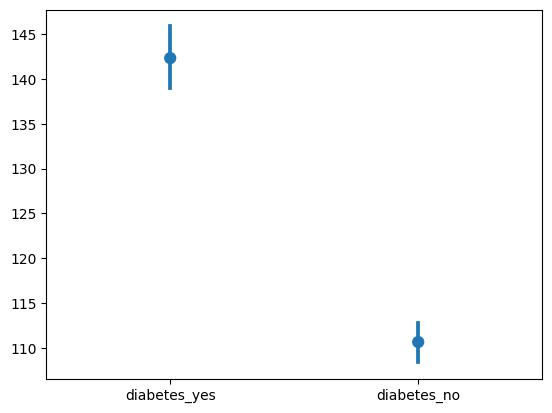

In [88]:
import seaborn as sns

g = sns.pointplot(data=[i['glucose'],
                        o['glucose']], join=False)
                        
g.set(xticklabels = ['diabetes_yes', 'diabetes_no'])